In [1]:
import numpy as np
import pandas as pd

# Tardy Time Scheduling

In [80]:
num_machines = 3
num_jobs = 3
num_operations = 3
jom_mat = np.array([[[1,7],[3,8],[2,10]],[[3,6],[1,4],[2,12]],[[2,8],[1,8],[3,7]]])
machine_mat = np.array([[1,2,1,2],[1,2,1,2],[1,2,1,2]])
minimization_criteria = 0
due_dates = np.array([26,26,17])
arrival_dates = [0,0,0]
penalty_cost = [1,1,1]
jom_mat = np.array(jom_mat)
machine_mat = np.array(machine_mat)
due_dates = np.array(due_dates)
arrival_dates = np.array(arrival_dates)

In [81]:
for i in range(num_jobs):
    for j in range(num_operations):
            jom_mat[i][j][0]-=1

In [82]:
idle_times = [0]*(num_machines)
running_energy_costs = [0]*num_machines
waiting_energy_costs = [0]*num_machines

In [83]:
indices = np.zeros(num_jobs)
running_indices = num_jobs
prev_finish_time = arrival_dates
relative_due_dates = due_dates - min(due_dates)
scheduled_jobs = []
machine_free_time = []

for i in range(num_machines):
    machine_free_time.append([0]*machine_mat[i][0])

while running_indices:
    running_indices = 0
    next_index = 0
    least_time = float('inf')
    for i in range(num_jobs):
        if (indices[i]<num_operations and jom_mat[i][int(indices[i])][0]>=0):
            running_indices += 1
            new_tardy_time = prev_finish_time[i]+jom_mat[i][int(indices[i])][1]
            if (new_tardy_time<least_time):
                least_time = new_tardy_time
                next_index = i
            elif (new_tardy_time==least_time and jom_mat[i][int(indices[i])][1]<jom_mat[i][int(indices[next_index])][1]):
                next_index = i
            
    if running_indices ==0:
        break
    new_finish_time = jom_mat[next_index][int(indices[next_index])][1] + max(machine_free_time[jom_mat[next_index][int(indices[next_index])][0]][0],prev_finish_time[next_index])
    prev_time = max(machine_free_time[jom_mat[next_index][int(indices[next_index])][0]][0],prev_finish_time[next_index])
    scheduled_jobs.append([next_index,int(indices[next_index]),prev_time,new_finish_time])
    
    idle_times[jom_mat[next_index][int(indices[next_index])][0]] += max(0,prev_finish_time[next_index] - machine_free_time[jom_mat[next_index][int(indices[next_index])][0]][0])
    running_energy_costs[jom_mat[next_index][int(indices[next_index])][0]] += jom_mat[next_index][int(indices[next_index])][1]*machine_mat[jom_mat[next_index][int(indices[next_index])][0]][1]
    waiting_energy_costs[jom_mat[next_index][int(indices[next_index])][0]] = idle_times[jom_mat[next_index][int(indices[next_index])][0]]*machine_mat[jom_mat[next_index][int(indices[next_index])][0]][3]
    prev_finish_time[next_index] = new_finish_time
    machine_free_time[jom_mat[next_index][int(indices[next_index])][0]][0] = new_finish_time
    machine_free_time[jom_mat[next_index][int(indices[next_index])][0]] = sorted(machine_free_time[jom_mat[next_index][int(indices[next_index])][0]])
    indices[next_index]+=1

print(scheduled_jobs)

[[1, 0, 0, 6], [0, 0, 0, 7], [2, 0, 0, 8], [1, 1, 7, 11], [0, 1, 7, 15], [2, 1, 11, 19], [1, 2, 11, 23], [0, 2, 23, 33], [2, 2, 19, 26]]


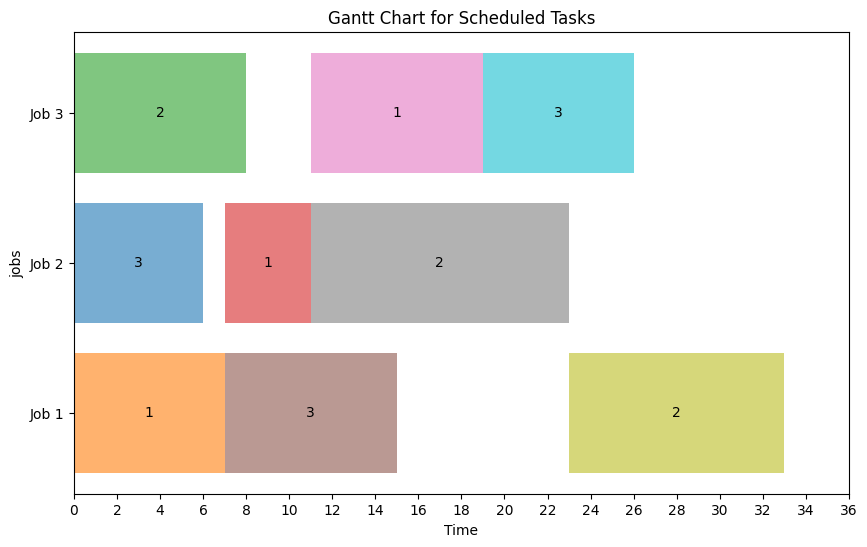

In [84]:
import matplotlib.pyplot as plt

max_end_time = max(job[3] for job in scheduled_jobs)

colors = plt.cm.tab10(np.linspace(0, 1, num_jobs*num_operations))

plt.figure(figsize=(10, 6))

for i, job in enumerate(scheduled_jobs):
    job_index = job[0]
    operation_index = job[1]
    machine_index = jom_mat[job_index][operation_index][0]
    color = colors[i]
    plt.barh(job_index, job[3] - job[2], left=job[2], color=color, alpha=0.6)
    plt.text(job[2] + (job[3] - job[2])/2, job[0], machine_index+1, ha='center', va='center')

plt.xlabel('Time')
plt.ylabel('jobs')
plt.title('Gantt Chart for Scheduled Tasks')
plt.yticks(range(num_jobs), [f'Job {i+1}' for i in range(num_jobs)])
plt.xticks(range(0, max_end_time+5, 2))
plt.show()

In [79]:
print("Idle times :",idle_times)
print("running_energy_costs :",running_energy_costs)
print("waiting_energy_costs :",waiting_energy_costs)

Idle times : [7, 2, 2]
running_energy_costs : [38, 60, 42]
waiting_energy_costs : [14, 4, 4]


In [93]:
total_energy_costs = [0]*num_jobs
total_costs = 0
for i in range(num_machines):
    total_energy_costs[i] += machine_mat[i][2]+running_energy_costs[i]+waiting_energy_costs[i]
    total_costs+=machine_mat[i][2]+running_energy_costs[i]+waiting_energy_costs[i]
print("Total Energy Costs :",total_energy_costs)

Total Energy Costs : [39, 67, 53]


In [94]:
penalty_costs = 0
for i in range(num_jobs):
    penalty_costs += max(0,prev_finish_time[i]-due_dates[i])*penalty_cost[i]
total_costs += penalty_costs

In [95]:
print("Total Penalty Costs :",penalty_costs)
print("Total Costs :",total_costs)

Total Penalty Costs : 16
Total Costs : 175


# Running energy consumption

In [52]:
num_machines = 2
num_jobs = 3
num_operations = 1
jom_mat = np.array([[[0,8]],[[0,2]],[[0,10]]])
machine_mat = np.array([[1,3,1,2],[1,5,1,2]])
minimization_criteria = 1
due_dates = np.array([26,26,17])
arrival_dates = [5,1,5]
warmup_times = [2,1]
penalty_cost = [1,1,1]
jom_mat = np.array(jom_mat)
machine_mat = np.array(machine_mat)
due_dates = np.array(due_dates)
arrival_dates = np.array(arrival_dates)         

In [53]:
jom_mat = np.array([[[0,8]],[[0,2]],[[0,10]]])

sorted_indices = np.argsort(arrival_dates)
jom_mat = jom_mat[sorted_indices]
arrival_dates = sorted(arrival_dates)

In [54]:
jom_mat

array([[[ 0,  2]],

       [[ 0,  8]],

       [[ 0, 10]]])

In [55]:
           
idle_times = [0]*(num_machines)
running_energy_costs = [0]*num_machines
waiting_energy_costs = [0]*num_machines
warmup_energy_costs = [0]*num_machines
total_energy_costs = [0]*num_machines

In [56]:

prev_finish_time = [0]*num_jobs
scheduled_jobs = []
machine_free_time = [0]*num_machines
    
for i in range(num_jobs):
    machine_idx = 0
    least_time = float('inf')
    machine_run_cost = float('inf')
    for j in range(num_machines):
        if (machine_free_time[j]<=arrival_dates[i] and least_time!=arrival_dates[i]):
            machine_idx=j
            least_time = arrival_dates[i]
            machine_run_cost = machine_mat[j][1]
        elif (machine_free_time[j]<=arrival_dates[i] and machine_mat[j][1]<machine_run_cost):
            machine_idx=j
            least_time = arrival_dates[i]
            machine_run_cost = machine_mat[j][1]
        elif (machine_free_time[j]<least_time and machine_free_time[j]>arrival_dates[i]):
            machine_idx=j
            least_time = machine_free_time[j]
            machine_run_cost = machine_mat[j][1]
        elif (machine_free_time[j]==least_time and machine_mat[j][1]<machine_run_cost and machine_free_time[j]>arrival_dates[i]):
            machine_idx=j
            least_time = machine_free_time[j]
            machine_run_cost = machine_mat[j][1]
    
    job_start_time = max(arrival_dates[i],machine_free_time[machine_idx])
    print(job_start_time,arrival_dates[i])
    job_end_time = job_start_time + warmup_times[machine_idx] + jom_mat[i][0][1]
    waiting_energy_costs[machine_idx] += max(0,job_start_time - machine_free_time[machine_idx])*machine_mat[machine_idx][2]
    warmup_energy_costs[machine_idx] += warmup_times[machine_idx]*machine_mat[machine_idx][3]
    running_energy_costs[machine_idx] += jom_mat[i][0][1]*machine_mat[machine_idx][1]
    total_energy_costs[machine_idx] =  waiting_energy_costs[machine_idx] + warmup_energy_costs[machine_idx] + running_energy_costs[machine_idx]
    idle_times[machine_idx] += max(0,job_start_time - machine_free_time[machine_idx])
    machine_free_time[machine_idx] = job_end_time
    scheduled_jobs.append([i,0,job_start_time+warmup_times[machine_idx],job_end_time,machine_idx+1])
    

1 1
5 5
5 5


In [57]:
scheduled_jobs

[[0, 0, 3, 5, 1], [1, 0, 7, 15, 1], [2, 0, 6, 16, 2]]

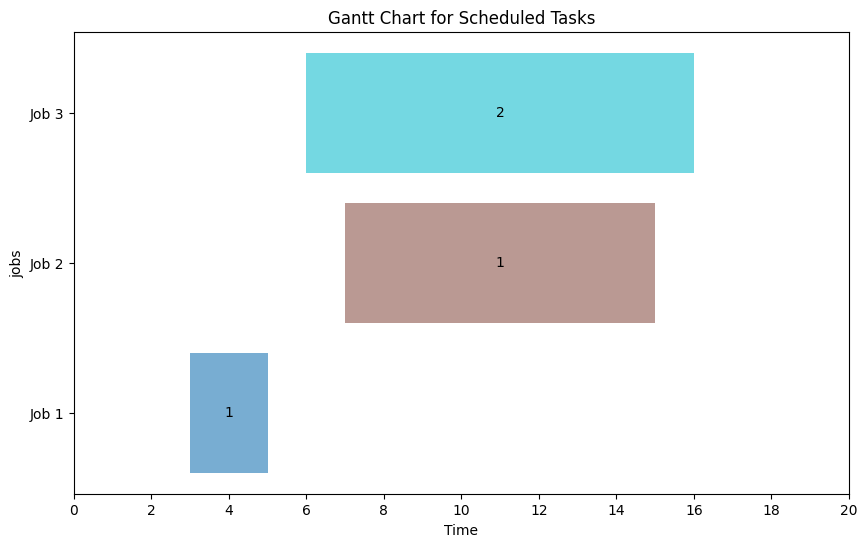

In [58]:
import matplotlib.pyplot as plt

max_end_time = max(job[3] for job in scheduled_jobs)

colors = plt.cm.tab10(np.linspace(0, 1, num_jobs*num_operations))

plt.figure(figsize=(10, 6))

for i, job in enumerate(scheduled_jobs):
    job_index = job[0]
    operation_index = job[1]
    machine_index = jom_mat[job_index][operation_index][0]
    color = colors[i]
    plt.barh(job_index, job[3] - job[2], left=job[2], color=color, alpha=0.6)
    plt.text(job[2] + (job[3] - job[2])/2, job[0], job[4], ha='center', va='center')

plt.xlabel('Time')
plt.ylabel('jobs')
plt.title('Gantt Chart for Scheduled Tasks')
plt.yticks(range(num_jobs), [f'Job {i+1}' for i in range(num_jobs)])
plt.xticks(range(0, max_end_time+5, 2))
plt.show()

In [59]:
print("Idle times :",idle_times)
print("running_energy_costs :",running_energy_costs)
print("waiting_energy_costs :",waiting_energy_costs)
total_energy_costs = [0]*num_jobs
total_costs = 0
for i in range(num_machines):
    total_energy_costs[i] += machine_mat[i][2]+running_energy_costs[i]+waiting_energy_costs[i]
    total_costs+=machine_mat[i][2]+running_energy_costs[i]+waiting_energy_costs[i]
print("Total Energy Costs :",total_energy_costs)
penalty_costs = 0
for i in range(num_jobs):
    penalty_costs += max(0,prev_finish_time[i]-due_dates[i])*penalty_cost[i]
total_costs += penalty_costs
print("Total Penalty Costs :",penalty_costs)
print("Total Costs :",total_costs)

Idle times : [1, 5]
running_energy_costs : [30, 50]
waiting_energy_costs : [1, 5]
Total Energy Costs : [32, 56, 0]
Total Penalty Costs : 0
Total Costs : 88


# Warmup energy consumption

In [60]:
num_machines = 2
num_jobs = 3
num_operations = 1
jom_mat = np.array([[[0,8]],[[0,2]],[[0,10]]])
machine_mat = np.array([[1,1,5,2],[1,1,3,2]])
minimization_criteria = 1
due_dates = np.array([26,26,17])
arrival_dates = [5,1,5]
warmup_times = [2,1]
penalty_cost = [1,1,1]
jom_mat = np.array(jom_mat)
machine_mat = np.array(machine_mat)
due_dates = np.array(due_dates)
arrival_dates = np.array(arrival_dates)         

In [61]:
jom_mat = np.array([[[0,8]],[[0,2]],[[0,10]]])

sorted_indices = np.argsort(arrival_dates)
jom_mat = jom_mat[sorted_indices]
arrival_dates = sorted(arrival_dates)


In [62]:
           
idle_times = [0]*(num_machines)
running_energy_costs = [0]*num_machines
waiting_energy_costs = [0]*num_machines
warmup_energy_costs = [0]*num_machines
total_energy_costs = [0]*num_machines

In [63]:

prev_finish_time = [0]*num_jobs
scheduled_jobs = []
machine_free_time = [0]*num_machines
    
for i in range(num_jobs):
    machine_idx = 0
    least_time = float('inf')
    machine_run_cost = float('inf')
    for j in range(num_machines):
        if (machine_free_time[j]<=arrival_dates[i] and least_time!=arrival_dates[i]):
            machine_idx=j
            least_time = arrival_dates[i]
            machine_run_cost = machine_mat[j][2]
        elif (machine_free_time[j]<=arrival_dates[i] and machine_mat[j][2]<machine_run_cost):
            machine_idx=j
            least_time = arrival_dates[i]
            machine_run_cost = machine_mat[j][2]
        elif (machine_free_time[j]<least_time and machine_free_time[j]>arrival_dates[i]):
            machine_idx=j
            least_time = machine_free_time[j]
            machine_run_cost = machine_mat[j][2]
        elif (machine_free_time[j]==least_time and machine_mat[j][2]<machine_run_cost and machine_free_time[j]>arrival_dates[i]):
            machine_idx=j
            least_time = machine_free_time[j]
            machine_run_cost = machine_mat[j][2]
    
    job_start_time = max(arrival_dates[i],machine_free_time[machine_idx])
    print(job_start_time,arrival_dates[i])
    job_end_time = job_start_time + warmup_times[machine_idx] + jom_mat[i][0][1]
    waiting_energy_costs[machine_idx] += max(0,job_start_time - machine_free_time[machine_idx])*machine_mat[machine_idx][2]
    warmup_energy_costs[machine_idx] += warmup_times[machine_idx]*machine_mat[machine_idx][3]
    running_energy_costs[machine_idx] += jom_mat[i][0][1]*machine_mat[machine_idx][1]
    total_energy_costs[machine_idx] =  waiting_energy_costs[machine_idx] + warmup_energy_costs[machine_idx] + running_energy_costs[machine_idx]
    idle_times[machine_idx] += max(0,job_start_time - machine_free_time[machine_idx])
    machine_free_time[machine_idx] = job_end_time
    scheduled_jobs.append([i,0,job_start_time+warmup_times[machine_idx],job_end_time,machine_idx+1])
    

1 1
5 5
5 5


In [64]:
scheduled_jobs

[[0, 0, 2, 4, 2], [1, 0, 6, 14, 2], [2, 0, 7, 17, 1]]

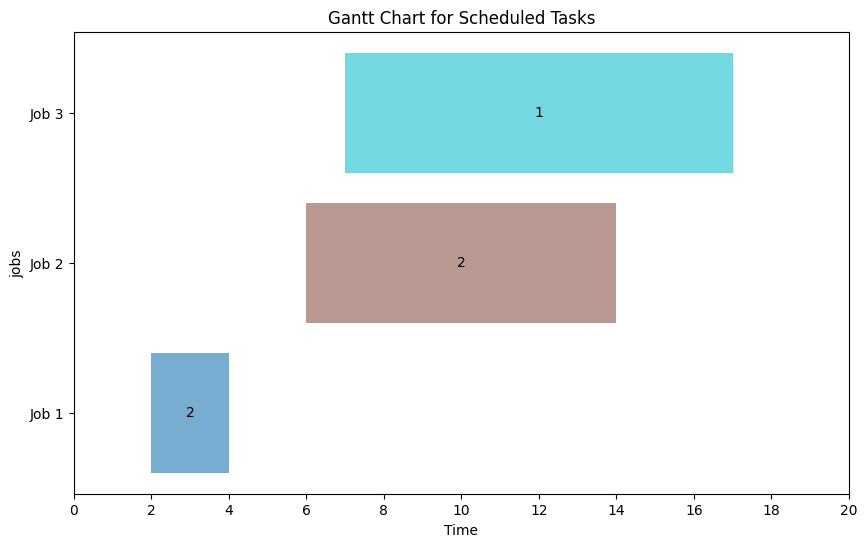

In [65]:
import matplotlib.pyplot as plt

max_end_time = max(job[3] for job in scheduled_jobs)

colors = plt.cm.tab10(np.linspace(0, 1, num_jobs*num_operations))

plt.figure(figsize=(10, 6))

for i, job in enumerate(scheduled_jobs):
    job_index = job[0]
    operation_index = job[1]
    machine_index = jom_mat[job_index][operation_index][0]
    color = colors[i]
    plt.barh(job_index, job[3] - job[2], left=job[2], color=color, alpha=0.6)
    plt.text(job[2] + (job[3] - job[2])/2, job[0], job[4], ha='center', va='center')

plt.xlabel('Time')
plt.ylabel('jobs')
plt.title('Gantt Chart for Scheduled Tasks')
plt.yticks(range(num_jobs), [f'Job {i+1}' for i in range(num_jobs)])
plt.xticks(range(0, max_end_time+5, 2))
plt.show()

In [66]:
print("Idle times :",idle_times)
print("running_energy_costs :",running_energy_costs)
print("waiting_energy_costs :",waiting_energy_costs)
total_energy_costs = [0]*num_jobs
total_costs = 0
for i in range(num_machines):
    total_energy_costs[i] += machine_mat[i][2]+running_energy_costs[i]+waiting_energy_costs[i]
    total_costs+=machine_mat[i][2]+running_energy_costs[i]+waiting_energy_costs[i]
print("Total Energy Costs :",total_energy_costs)
penalty_costs = 0
for i in range(num_jobs):
    penalty_costs += max(0,prev_finish_time[i]-due_dates[i])*penalty_cost[i]
total_costs += penalty_costs
print("Total Penalty Costs :",penalty_costs)
print("Total Costs :",total_costs)

Idle times : [5, 2]
running_energy_costs : [10, 10]
waiting_energy_costs : [25, 6]
Total Energy Costs : [40, 19, 0]
Total Penalty Costs : 0
Total Costs : 59


# Waiting + Warmup Energy Costs

In [67]:
num_machines = 2
num_jobs = 3
num_operations = 1
jom_mat = np.array([[[0,8]],[[0,2]],[[0,10]]])
machine_mat = np.array([[1,6,5,3],[1,4,3,14]])
minimization_criteria = 1
due_dates = np.array([26,26,17])
arrival_dates = [5,1,5]
warmup_times = [2,1]
penalty_cost = [1,1,1]
jom_mat = np.array(jom_mat)
machine_mat = np.array(machine_mat)
due_dates = np.array(due_dates)
arrival_dates = np.array(arrival_dates)         

In [68]:
jom_mat = np.array([[[0,8]],[[0,2]],[[0,10]]])

sorted_indices = np.argsort(arrival_dates)
jom_mat = jom_mat[sorted_indices]
arrival_dates = sorted(arrival_dates)


In [69]:
           
idle_times = [0]*(num_machines)
running_energy_costs = [0]*num_machines
waiting_energy_costs = [0]*num_machines
warmup_energy_costs = [0]*num_machines
total_energy_costs = [0]*num_machines

In [70]:

prev_finish_time = [0]*num_jobs
scheduled_jobs = []
machine_free_time = [0]*num_machines
    
for i in range(num_jobs):
    machine_idx = 0
    least_time = float('inf')
    machine_run_cost = float('inf')
    for j in range(num_machines):
        if (machine_free_time[j]<=arrival_dates[i] and least_time!=arrival_dates[i]):
            machine_idx=j
            least_time = arrival_dates[i]
            machine_run_cost = machine_mat[j][2]+ machine_mat[j][3]
        elif (machine_free_time[j]<=arrival_dates[i] and machine_mat[j][2]+ machine_mat[j][3]<machine_run_cost):
            machine_idx=j
            least_time = arrival_dates[i]
            machine_run_cost = machine_mat[j][2]+ machine_mat[j][3]
        elif (machine_free_time[j]<least_time and machine_free_time[j]>arrival_dates[i]):
            machine_idx=j
            least_time = machine_free_time[j]
            machine_run_cost = machine_mat[j][2]+ machine_mat[j][3]
        elif (machine_free_time[j]==least_time and machine_mat[j][2]+ machine_mat[j][3]<machine_run_cost and machine_free_time[j]>arrival_dates[i]):
            machine_idx=j
            least_time = machine_free_time[j]
            machine_run_cost = machine_mat[j][2]+ machine_mat[j][3]
    
    job_start_time = max(arrival_dates[i],machine_free_time[machine_idx])
    print(job_start_time,arrival_dates[i])
    job_end_time = job_start_time + warmup_times[machine_idx] + jom_mat[i][0][1]
    waiting_energy_costs[machine_idx] += max(0,job_start_time - machine_free_time[machine_idx])*machine_mat[machine_idx][2]
    warmup_energy_costs[machine_idx] += warmup_times[machine_idx]*machine_mat[machine_idx][3]
    running_energy_costs[machine_idx] += jom_mat[i][0][1]*machine_mat[machine_idx][1]
    total_energy_costs[machine_idx] =  waiting_energy_costs[machine_idx] + warmup_energy_costs[machine_idx] + running_energy_costs[machine_idx]
    idle_times[machine_idx] += max(0,job_start_time - machine_free_time[machine_idx])
    machine_free_time[machine_idx] = job_end_time
    scheduled_jobs.append([i,0,job_start_time+warmup_times[machine_idx],job_end_time,machine_idx+1])
    

1 1
5 5
5 5


In [71]:
scheduled_jobs

[[0, 0, 3, 5, 1], [1, 0, 7, 15, 1], [2, 0, 6, 16, 2]]

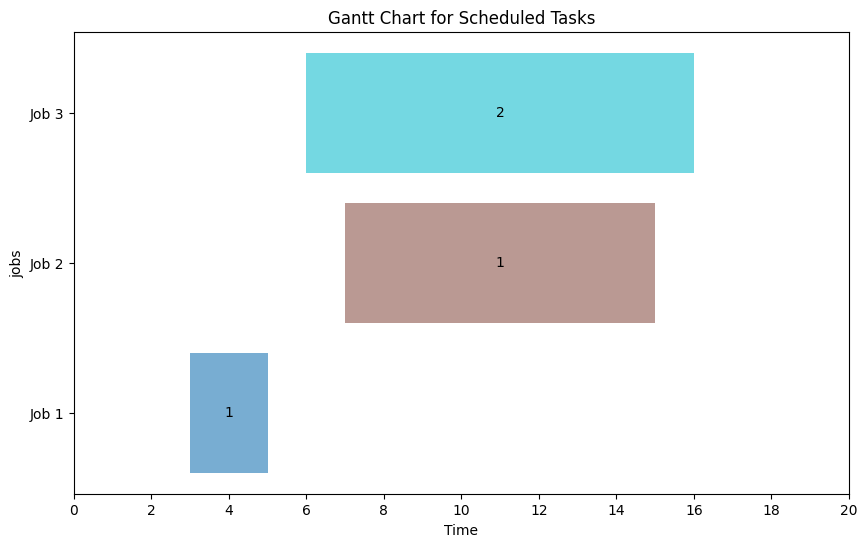

In [72]:
import matplotlib.pyplot as plt

max_end_time = max(job[3] for job in scheduled_jobs)

colors = plt.cm.tab10(np.linspace(0, 1, num_jobs*num_operations))

plt.figure(figsize=(10, 6))

for i, job in enumerate(scheduled_jobs):
    job_index = job[0]
    operation_index = job[1]
    machine_index = jom_mat[job_index][operation_index][0]
    color = colors[i]
    plt.barh(job_index, job[3] - job[2], left=job[2], color=color, alpha=0.6)
    plt.text(job[2] + (job[3] - job[2])/2, job[0], job[4], ha='center', va='center')

plt.xlabel('Time')
plt.ylabel('jobs')
plt.title('Gantt Chart for Scheduled Tasks')
plt.yticks(range(num_jobs), [f'Job {i+1}' for i in range(num_jobs)])
plt.xticks(range(0, max_end_time+5, 2))
plt.show()

In [73]:
print("Idle times :",idle_times)
print("running_energy_costs :",running_energy_costs)
print("waiting_energy_costs :",waiting_energy_costs)
total_energy_costs = [0]*num_jobs
total_costs = 0
for i in range(num_machines):
    total_energy_costs[i] += machine_mat[i][2]+running_energy_costs[i]+waiting_energy_costs[i]
    total_costs+=machine_mat[i][2]+running_energy_costs[i]+waiting_energy_costs[i]
print("Total Energy Costs :",total_energy_costs)
penalty_costs = 0
for i in range(num_jobs):
    penalty_costs += max(0,prev_finish_time[i]-due_dates[i])*penalty_cost[i]
total_costs += penalty_costs
print("Total Penalty Costs :",penalty_costs)
print("Total Costs :",total_costs)

Idle times : [1, 5]
running_energy_costs : [60, 40]
waiting_energy_costs : [5, 15]
Total Energy Costs : [70, 58, 0]
Total Penalty Costs : 0
Total Costs : 128
